# On Mahalanobis distance in functional settings
Work by Berrendero, et.al. ([link](https://arxiv.org/abs/1803.06550))

The main idea:
> Given two functions $x, m \in L^2[0,1]$, just approximate them by two other functions $x_\alpha, m_\alpha \in \mathcal{H}(K)$ and calculate the distance $\vert\vert x_\alpha - m_\alpha\vert\vert_K$.

In [ ]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_format = "retina"

$$
    x_\alpha = (\mathcal K + \alpha \mathbb{I})^{-1} \mathcal K x = \sum_{j=1}^\infty \frac{\lambda_j}{\alpha + \lambda_j} \langle x, e_j \rangle_2 e_j
$$


The functional Mahalanobis distance is given by
$$
    M_\alpha(x, m)^2 = \sum_{j=1}^\infty \frac{\lambda_j}{(\lambda_j + \alpha)^2}\langle x - m, e_j \rangle_2^2
$$

In [125]:
def sample_brownian_motion(key, T, N, n_samples=1):
    dwt = jax.random.normal(key, (n_sims, N)) / jnp.sqrt(N)
    wt = dwt.cumsum(axis=1)
    return wt
    
def sample_brownian_bridge(key, T, N, n_samples=1):
    timesteps = jnp.linspace(0, T, N)
    wt = sample_brownian_motion(key, T, N, n_samples)
    wt_bridge = wt - jnp.einsum("m,t->mt", wt[:, -1], timesteps) / T
    return wt_bridge

In [127]:
key = jax.random.PRNGKey(314)
key_bm, key_bb = jax.random.split(key)
T = 1
N = 100
n_sims = 10
timesteps = jnp.linspace(0, T, N)

wt = sample_brownian_motion(key_bm, T, N, n_sims)
wb_t = sample_brownian_bridge(key_bb, T, N, n_sims)

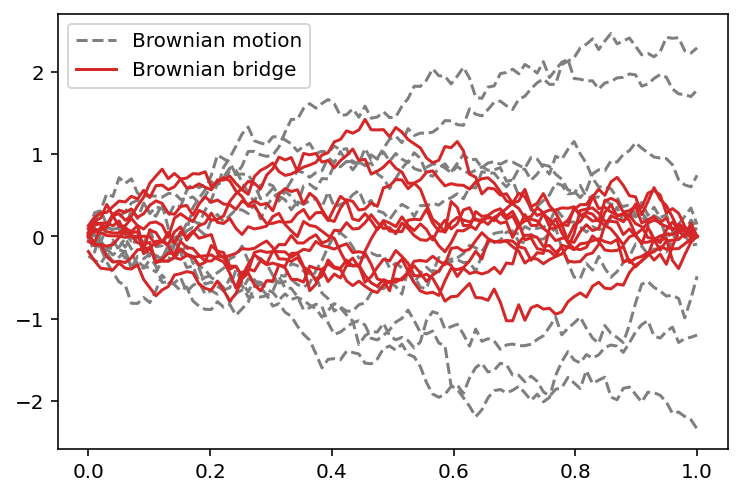

In [128]:
p1, *_ = plt.plot(timesteps, wt.T, c="tab:gray", linestyle="--", label="Brownian motion")
p2, *_ = plt.plot(timesteps, wb_t.T, c="tab:red", label="Brownian bridge")
ps = [p1, p2]
labels = [p.get_label() for p in ps]
plt.legend(ps, labels)

In [209]:
n_sims = 250
wt = sample_brownian_motion(key_bm, T, N, n_sims)
wb_t = sample_brownian_bridge(key_bb, T, N, n_sims)

In [210]:
K1 = jnp.cov(wt.T)
eigvals, eigvecs = jnp.linalg.eigh(K1)

In [211]:
eigvecs[:,0] @ eigvecs[:,0]

DeviceArray(1.0000002, dtype=float32)

In [212]:
eigvecs.shape

(100, 100)

In [213]:
wt.shape

(250, 100)

In [236]:
wt.shape

(250, 100)

In [237]:
eigvecs.shape

(100, 100)

In [255]:
alpha = 1e-3
coeffs = eigvals / (alpha + eigvals)
wt_alpha = jnp.einsum("j,nm,mj,->nk", coeffs, wt, eigvecs, eigvecs)

ValueError: Number of einsum subscripts must be equal to the number of operands.

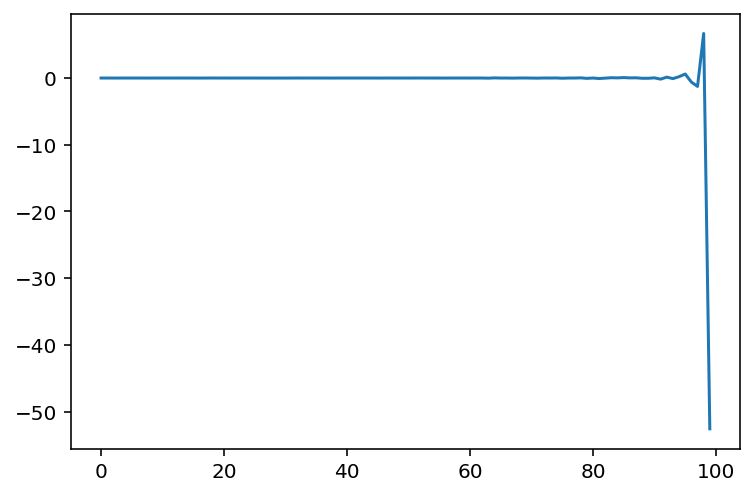

In [256]:
plt.plot(wt_alpha[0])